In [3]:
import pandas as pd
df=pd.read_csv('CarPrice.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
# Remove unnecessary cols
df.drop('CarName', axis=1, inplace=True)

In [6]:
print(df.isnull().sum())

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
# Encode categorical cols
cat_cols = df.select_dtypes(include='object').columns

df = pd.get_dummies(
    df,
    columns=cat_cols,
    drop_first=True
)

In [12]:
# print Encode cols
cat_cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [16]:
# take a high correlation related featurs cols store  correlation_target
correlation_target = df.corr(numeric_only=True)['price'].sort_values(ascending=False)

In [18]:
# print top 13 correlation cols
top_correlation=correlation_target.head(13).index[1:]
top_correlation

Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength',
       'drivewheel_rwd', 'wheelbase', 'boreratio', 'fuelsystem_mpfi',
       'cylindernumber_six', 'enginetype_ohcv', 'enginelocation_rear'],
      dtype='object')

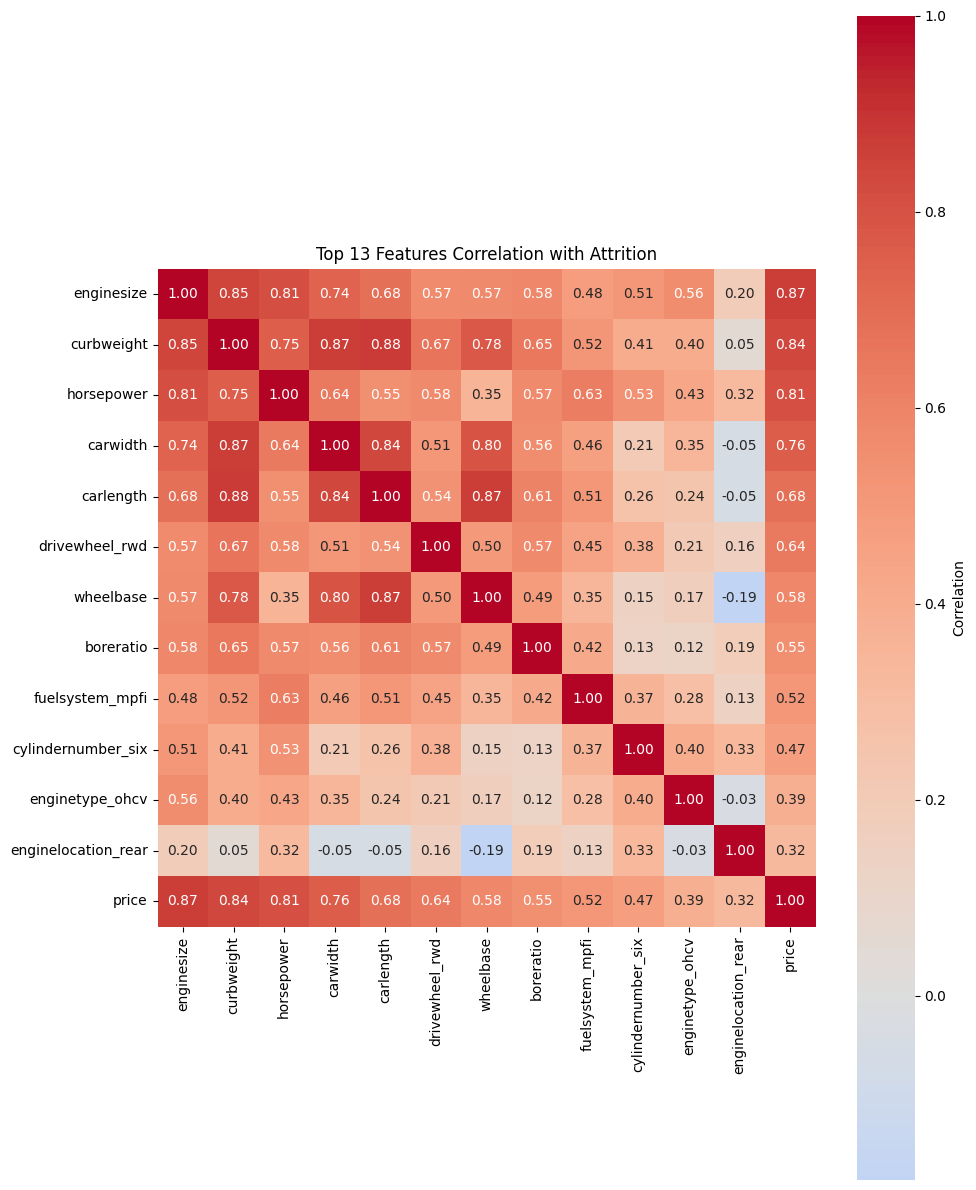

In [ ]:
# Using heat map to see the featurs
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,12))

heatmap_data = df[list(top_correlation) + ['price']]
corr_matrix = heatmap_data.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    fmt='.2f',
    cbar_kws={'label': 'Correlation'}
)

plt.title('Top 13 Features Correlation with price')
plt.tight_layout()
plt.show()

In [24]:
x=df[top_correlation]
y=df['price']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_tarin,y_test=train_test_split(x,y,train_size=0.2,random_state=42)


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [46]:
model_RL=RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
model_RL.fit(x_train,y_tarin)
y_pred_RL=model_RL.predict(x_test)
r2_acc=r2_score(y_test,y_pred_RL)
r2_acc


0.7804157053385916

In [34]:
model_LR=LinearRegression()
model_LR.fit(x_train,y_tarin)
y_pred_LR=model_LR.predict(x_test)
r2_acc=r2_score(y_test,y_pred_LR)
r2_acc

0.7303885579735063

In [35]:
model_KNN=KNeighborsRegressor()
model_KNN.fit(x_train,y_tarin)
y_pred_KNN=model_KNN.predict(x_test)
r2_acc=r2_score(y_test,y_pred_KNN)
r2_acc

0.6337764413727636

In [41]:
model_DT=DecisionTreeRegressor(
    max_depth=10,
    random_state=42
)
model_DT.fit(x_train,y_tarin)
y_pred_DT=model_DT.predict(x_test)
r2_acc=r2_score(y_test,y_pred_DT)
r2_acc

0.7800494374491082

In [51]:
import joblib
joblib.dump(model_DT,"car_price.pkl")
columns=x.columns.tolist()
joblib.dump(columns,"columns.pkl")

['columns.pkl']